In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
df = pd.read_csv("hazadous_filled.csv")
df.head(5)

,ID,LOCATION_LATITUDE,LOCATION_LONGITUDE,COMMODITY_RELEASED_TYPE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,FATAL,INJURE,ACCIDENT_IDENTIFIER,...,SCADA_IN_PLACE_IND,CPM_IN_PLACE_IND,CAUSE,CAUSE_DETAILS,EST_COST_OPER_PAID,EST_COST_GAS_RELEASED,EST_COST_PROP_DAMAGE,EST_COST_EMERGENCY,EST_COST_ENVIRONMENTAL,EST_COST_OTHER
0,0,45.565061,-122.742638,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,0.90,0.00,0.00,0,0,CONTROLLER,...,NO,NO,OTHER ACCIDENT CAUSE,UNKNOWN,0.0,103.0,15000.0,10000.0,0.0,0.0
1,1,30.549014,-91.168398,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,0.88,0.00,0.88,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",...,YES,NO,EQUIPMENT FAILURE,NON-THREADED CONNECTION FAILURE,0.0,160.0,1000.0,0.0,500.0,0.0
2,2,29.845391,-94.908820,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,1.42,8.77,0.00,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",...,YES,NO,EQUIPMENT FAILURE,NON-THREADED CONNECTION FAILURE,0.0,646.0,2500.0,0.0,0.0,0.0
3,3,29.845391,-94.908820,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,0.53,8.77,0.00,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",...,YES,NO,EQUIPMENT FAILURE,NON-THREADED CONNECTION FAILURE,0.0,594.0,2500.0,0.0,0.0,0.0
4,5,29.988186,-93.987212,CRUDE OIL,13.00,0.00,13.00,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",...,NO,NO,CORROSION FAILURE,INTERNAL CORROSION,0.0,1040.0,50000.0,95000.0,75000.0,0.0


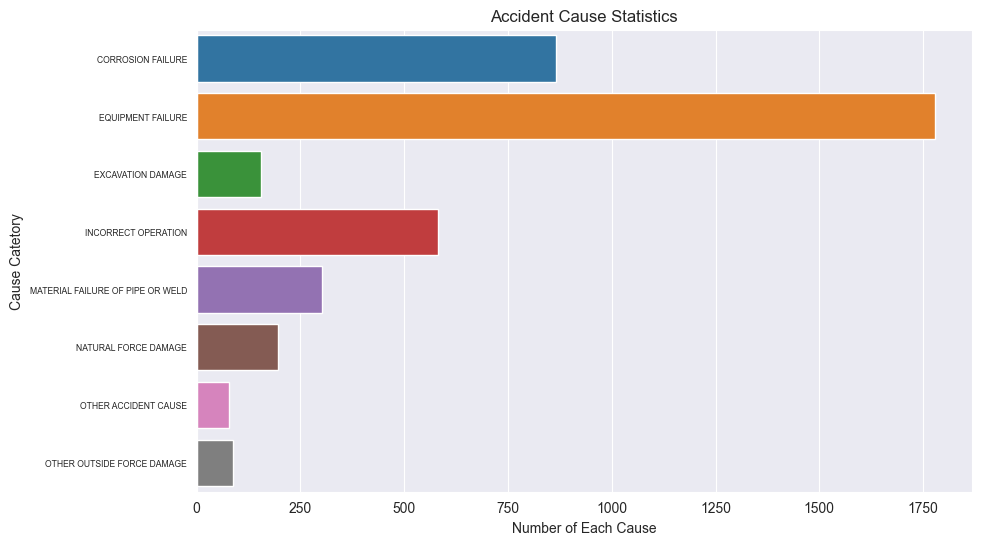

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='CAUSE',order=sorted(df['CAUSE'].unique()))
plt.title('Accident Cause Statistics')
plt.xlabel('Number of Each Cause')
plt.yticks(fontsize=6.2)
plt.ylabel('Cause Catetory')
plt.savefig("Cause Statistics.png", dpi=300)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15312\2748573950.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='totalCost', y='CAUSE', estimator=sum, ci=None, order=sorted(df['CAUSE'].unique()))


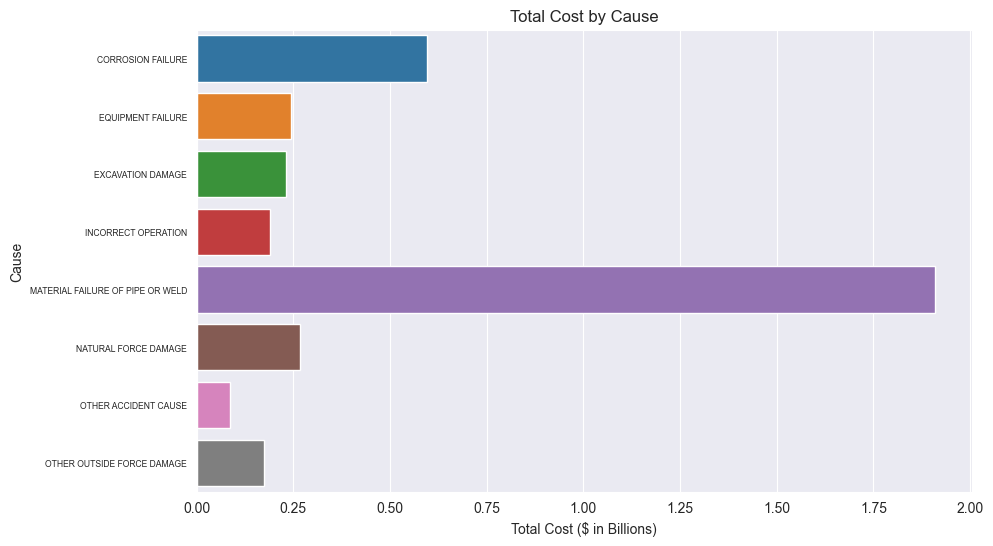

In [18]:
df["totalCost"] = df["EST_COST_PROP_DAMAGE"]+df["EST_COST_OTHER"]+df["EST_COST_OPER_PAID"]+df["EST_COST_GAS_RELEASED"]+df["EST_COST_ENVIRONMENTAL"]+df["EST_COST_EMERGENCY"]


# df.groupby("CAUSE")["totalCost"].sum().plot(kind='barh').sort().reset_index().sort_values(by="CAUSE")
# 定义自定义格式化函数来修改横坐标的单位

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='totalCost', y='CAUSE', estimator=sum, ci=None, order=sorted(df['CAUSE'].unique()))

def format_func(value, tick_number):
    return f'{value / 1e9:.2f}'

# 使用FuncFormatter来应用自定义格式化函数
ax.xaxis.set_major_formatter(FuncFormatter(format_func))
plt.xlabel("Total Cost ($ in Billions)")
plt.yticks(fontsize=6.2)
plt.ylabel("Cause")
plt.title("Total Cost by Cause")
plt.savefig("Cost by Cause.png", dpi=500)
plt.show()

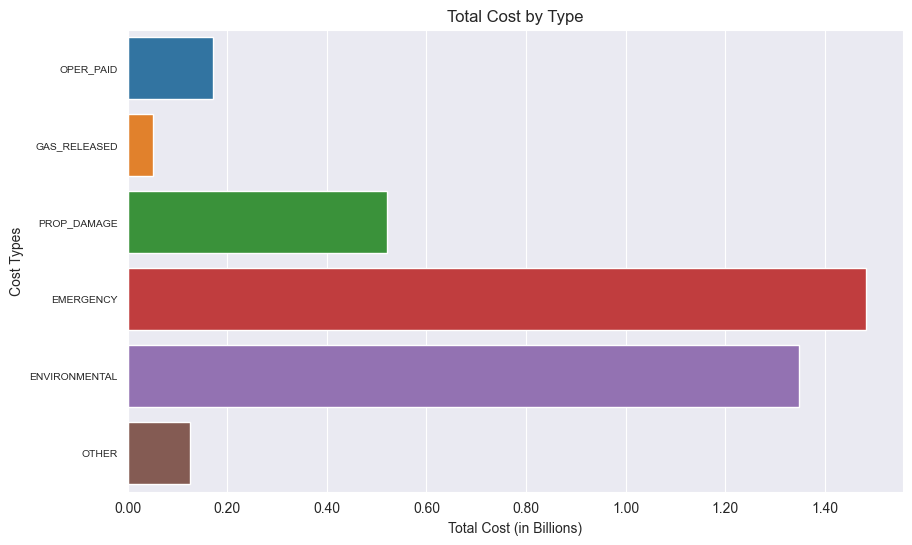

In [20]:

detailed_cost = df[['EST_COST_OPER_PAID','EST_COST_GAS_RELEASED','EST_COST_PROP_DAMAGE','EST_COST_EMERGENCY','EST_COST_ENVIRONMENTAL','EST_COST_OTHER']].sum()
detailed_cost = detailed_cost.rename({'EST_COST_OPER_PAID': 'OPER_PAID',
                                            'EST_COST_GAS_RELEASED': 'GAS_RELEASED',
                                            'EST_COST_PROP_DAMAGE': 'PROP_DAMAGE',
                                            'EST_COST_EMERGENCY': 'EMERGENCY',
                                            'EST_COST_ENVIRONMENTAL': 'ENVIRONMENTAL',
                                            'EST_COST_OTHER': 'OTHER'})
plt.figure(figsize=(10, 6))
# plt.bar(detailed_cost.index, detailed_cost.values)
bx = sns.barplot(y=detailed_cost.index, x=detailed_cost.values)

def format_func(value, tick_number):
    return f'{value / 1e9:.2f}'

# 使用FuncFormatter来应用自定义格式化函数
bx.xaxis.set_major_formatter(FuncFormatter(format_func))
plt.xlabel("Total Cost (in Billions)")
plt.yticks(fontsize = 7.5)
plt.ylabel("Cost Types")
plt.title("Total Cost by Type")
plt.savefig("Cost by type.png", dpi=500)


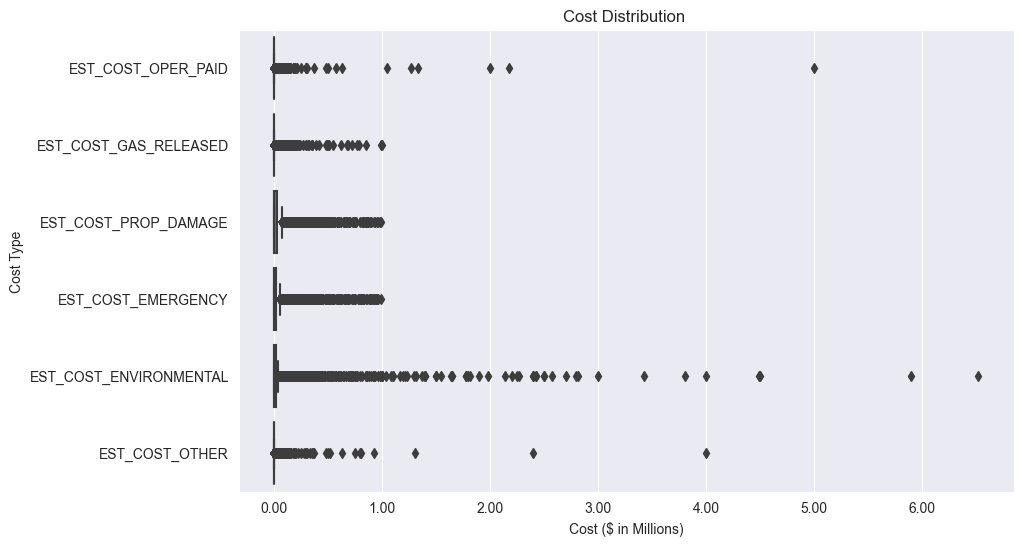

In [22]:
plt.figure(figsize=(10, 6))
detailed_cost = df[['EST_COST_OPER_PAID','EST_COST_GAS_RELEASED','EST_COST_PROP_DAMAGE','EST_COST_EMERGENCY','EST_COST_ENVIRONMENTAL','EST_COST_OTHER']]
detailed_cost = detailed_cost.rename({'EST_COST_OPER_PAID': 'OPER_PAID',
                                            'EST_COST_GAS_RELEASED': 'GAS_RELEASED',
                                            'EST_COST_PROP_DAMAGE': 'PROP_DAMAGE',
                                            'EST_COST_EMERGENCY': 'EMERGENCY',
                                            'EST_COST_ENVIRONMENTAL': 'ENVIRONMENTAL',
                                            'EST_COST_OTHER': 'OTHER'})
detailed_cost = detailed_cost[(detailed_cost['EST_COST_EMERGENCY']<1e6) & (detailed_cost['EST_COST_PROP_DAMAGE']<1e6)]

cx = sns.boxplot(data=detailed_cost, orient='h')

def format_func(value, tick_number):
    return f'{value / 1e6:.2f}'

# 使用FuncFormatter来应用自定义格式化函数
cx.xaxis.set_major_formatter(FuncFormatter(format_func))
plt.title('Cost Distribution ')
plt.xlabel('Cost ($ in Millions)')
plt.ylabel('Cost Type')
plt.show()

In [28]:
commodity_counts = df['COMMODITY_RELEASED_TYPE'].value_counts().reset_index()
pd.DataFrame(commodity_counts)
print(commodity_counts)
incident_count = df['INCIDENT_AREA_TYPE'].value_counts().reset_index()
print(incident_count)

                             COMMODITY_RELEASED_TYPE  count
0                                          CRUDE OIL   2064
1  REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...   1224
2  HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...    689
3                               CO2 (CARBON DIOXIDE)     63
4  BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL B...      5
                       INCIDENT_AREA_TYPE  count
0                             ABOVEGROUND   2160
1                             UNDERGROUND   1435
2  TANK, INCLUDING ATTACHED APPURTENANCES    433
3                         TRANSITION AREA     17


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df = pd.read_csv('hazadous_filled.csv')
df['CAUSE_DETAILS'] = df['CAUSE_DETAILS'].str.title()
text = df['CAUSE_DETAILS'].str.cat(sep=' ')

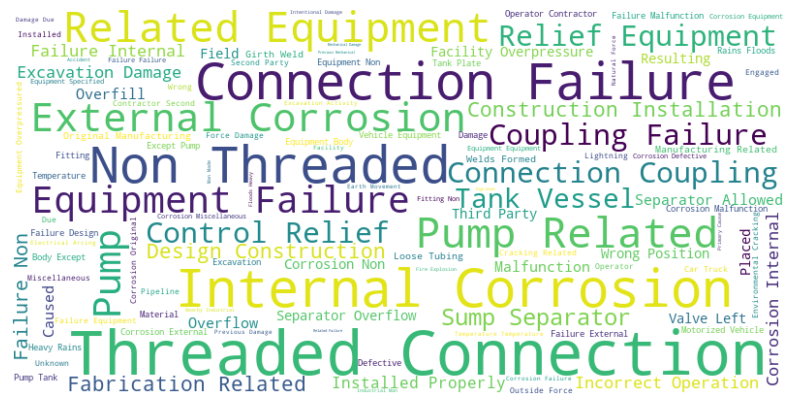

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white',mode='RGBA').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud of Cause Details.png", dpi=500, bbox_inches='tight', pad_inches=0.1)  # 保存图形
plt.show()



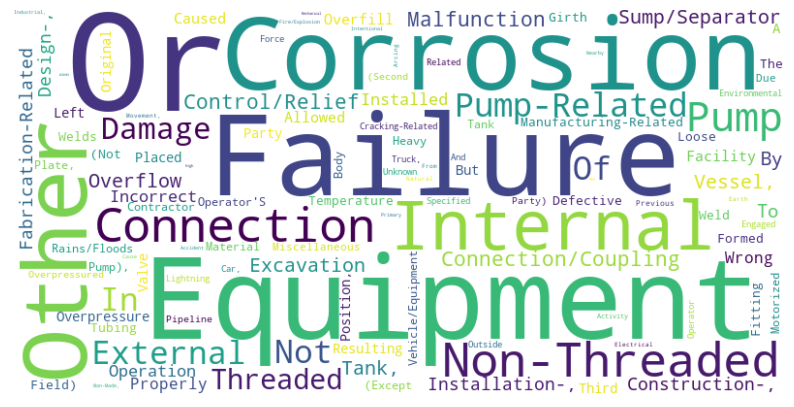

In [13]:
from collections import Counter

# 计算词频
word_freq = Counter(text.split())  # 假设文本是以空格分隔的

# 通过词频生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()